# Задача

В данном ноутбуке решается задача классификации

# Загрузка библиотек и данных

In [1]:
import numpy as np                # математика
import pandas as pd               # работа с табличными данными
import matplotlib.pyplot as plt   # визуализация
import seaborn  as sb             # визуализация (красивее, более высокоуровневые функции)

url="https://raw.githubusercontent.com/ivtipm/ML/main/datasets/churn.csv"
data=pd.read_csv(url)

# Обработка данных

In [2]:
data.head()

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<Axes: >

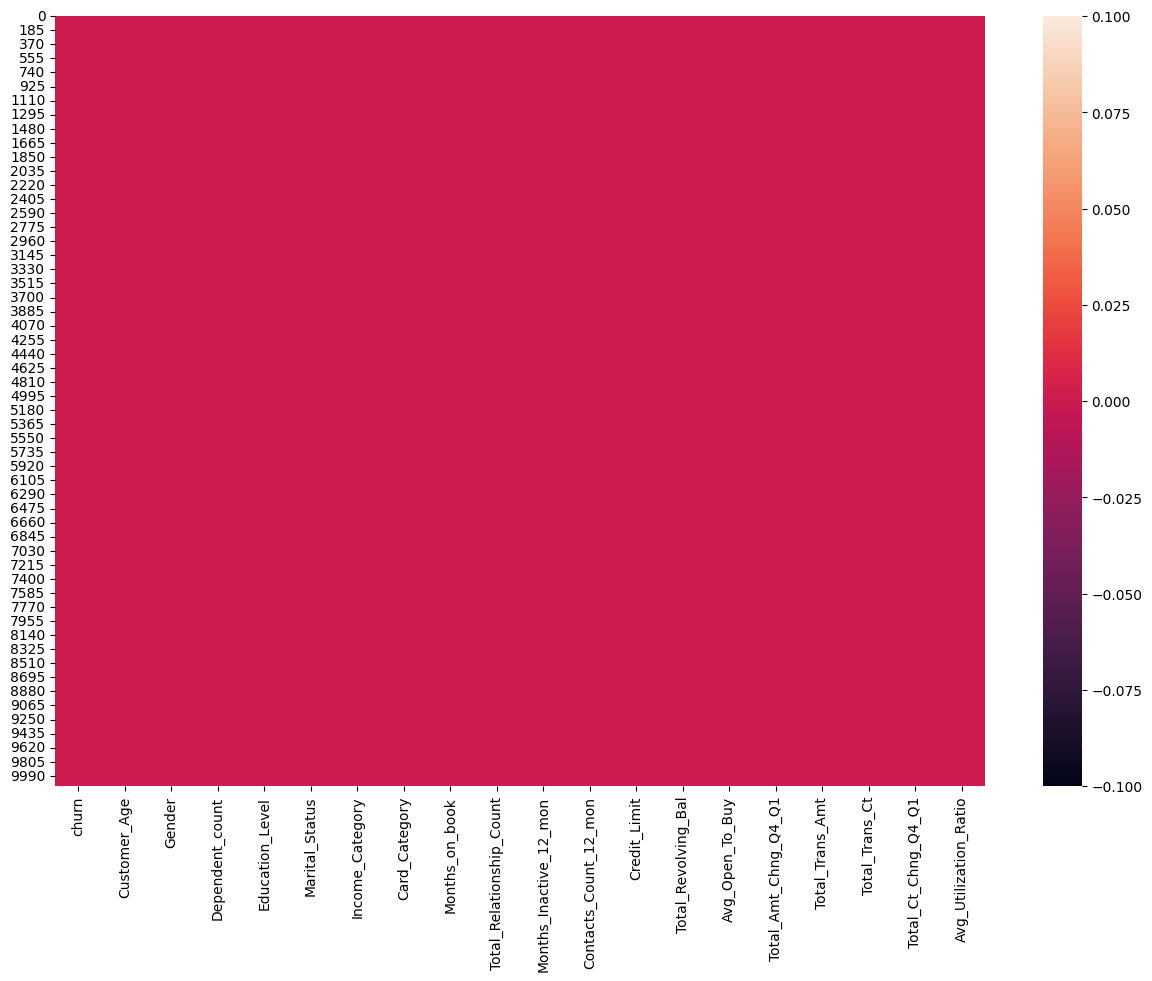

In [3]:
plt.figure( figsize=(15,10) )
sb.heatmap(data.isnull())

In [4]:
data.isna().sum(axis=0)  
# sum(axis=0)  -- суммирование пропусков (отметок True) с перебором строк (axis=0), т.е. вдоль столбцов

churn                       0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
UC = (data['Income_Category'] == 'Unknown').sum(axis=0)
print("Количество клиентов с неизвестным уровнем дохода:", UC)

Количество клиентов с неизвестным уровнем дохода: 1112


<Axes: xlabel='Income_Category', ylabel='count'>

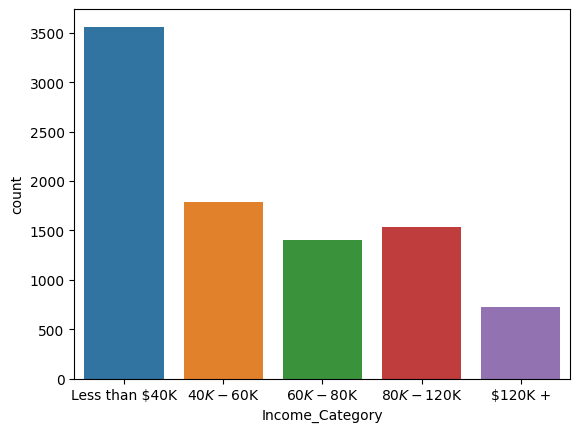

In [6]:
# убирание клиентов с неизвестным уровнем доходов
data_mask = (data['Income_Category'] != 'Unknown')
data = data[data_mask]

sb.countplot(x='Income_Category',
             data=data, 
             order=['Less than $40K', '$40K - $60K', '$60K - $80K','$80K - $120K', '$120K +'])

## Кодирование данных

### Доходов и статуса клиента

In [7]:
from sklearn.preprocessing import LabelEncoder    # класс для кодирования признаков

data_enc = data.copy()

data_enc['Income_Category'] = data_enc['Income_Category'].map({
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4 })

print('Unique churn:', data_enc['churn'].unique())

label_encode_churn = LabelEncoder()
data_enc['churn'] = label_encode_churn.fit_transform( data_enc['churn'] )

data_enc.head()

Unique churn: ['Existing Customer' 'Attrited Customer']


,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Пола

In [8]:
print('Unique gender:', data_enc['Gender'].unique())

Unique gender: ['M' 'F']


In [9]:
gender = pd.get_dummies(data_enc['Gender'], prefix='Gender') # one-hot кодирование
data_enc = data_enc.join( gender )

# inplace - изменяет объект, а не возвращает новый
data_enc.drop(columns=['Gender'], inplace=True)
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     9015 non-null   int64  
 1   Customer_Age              9015 non-null   int64  
 2   Dependent_count           9015 non-null   int64  
 3   Education_Level           9015 non-null   object 
 4   Marital_Status            9015 non-null   object 
 5   Income_Category           9015 non-null   int64  
 6   Card_Category             9015 non-null   object 
 7   Months_on_book            9015 non-null   int64  
 8   Total_Relationship_Count  9015 non-null   int64  
 9   Months_Inactive_12_mon    9015 non-null   int64  
 10  Contacts_Count_12_mon     9015 non-null   int64  
 11  Credit_Limit              9015 non-null   float64
 12  Total_Revolving_Bal       9015 non-null   int64  
 13  Avg_Open_To_Buy           9015 non-null   float64
 14  Total_A

### Семейного положения

In [10]:
print('Unique maritial status:', data_enc['Marital_Status'].unique())

Unique maritial status: ['Married' 'Single' 'Unknown' 'Divorced']


In [11]:
marital = pd.get_dummies(data_enc['Marital_Status'], prefix='Marital_Status')

data_enc = data_enc.join( marital )
data_enc.drop(columns=['Marital_Status'], inplace=True)

In [12]:
data_enc.filter(regex='Marital_Status').head()

,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


### Уровня карточки

In [13]:
print('Unique card category:', data_enc['Card_Category'].unique())

Unique card category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [14]:
data_enc['Card_Category'] = data_enc['Card_Category'].map({
    'Blue': 0, 'Silver': 1, 'Gold': 2,'Platinum': 3 })

### Уровня образования

In [15]:
print('Unique education level:', data_enc['Education_Level'].unique())

Unique education level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


In [16]:
[print(
    level, 
    'count:', 
     (data_enc['Education_Level'] == level).sum(axis=0)
     ) for level in data_enc['Education_Level'].unique()]

High School count: 1788
Graduate count: 2796
Uneducated count: 1302
Unknown count: 1374
College count: 905
Post-Graduate count: 469
Doctorate count: 381


[None, None, None, None, None, None, None]

In [17]:
ed_level = pd.get_dummies(data_enc['Education_Level'], prefix='Education_Level')

data_enc = data_enc.join( ed_level )
data_enc.drop(columns=['Education_Level'], inplace=True)

In [18]:
data_enc.filter(regex='Education_Level').head()

,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


In [19]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn                          9015 non-null   int64  
 1   Customer_Age                   9015 non-null   int64  
 2   Dependent_count                9015 non-null   int64  
 3   Income_Category                9015 non-null   int64  
 4   Card_Category                  9015 non-null   int64  
 5   Months_on_book                 9015 non-null   int64  
 6   Total_Relationship_Count       9015 non-null   int64  
 7   Months_Inactive_12_mon         9015 non-null   int64  
 8   Contacts_Count_12_mon          9015 non-null   int64  
 9   Credit_Limit                   9015 non-null   float64
 10  Total_Revolving_Bal            9015 non-null   int64  
 11  Avg_Open_To_Buy                9015 non-null   float64
 12  Total_Amt_Chng_Q4_Q1           9015 non-null   

In [20]:
data_enc

,churn,Customer_Age,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown
0,1,45,3,2,0,39,5,1,3,12691.0,...,1,0,0,0,0,0,1,0,0,0
1,1,49,5,0,0,44,6,1,2,8256.0,...,0,1,0,0,0,1,0,0,0,0
2,1,51,3,3,0,36,4,1,0,3418.0,...,1,0,0,0,0,1,0,0,0,0
3,1,40,4,0,0,34,3,4,1,3313.0,...,0,0,1,0,0,0,1,0,0,0
4,1,40,3,2,0,21,5,1,0,4716.0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,2,1,0,40,3,2,3,4003.0,...,0,1,0,0,0,1,0,0,0,0
10123,0,41,2,1,0,25,4,2,3,4277.0,...,0,0,0,0,0,0,0,0,0,1
10124,0,44,1,0,0,36,5,3,4,5409.0,...,1,0,0,0,0,0,1,0,0,0
10125,0,30,2,1,0,36,4,3,3,5281.0,...,0,0,1,0,0,1,0,0,0,0


## Визуализации

### Матрица корреляции

<ipython-input-21-9650c1a495a6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

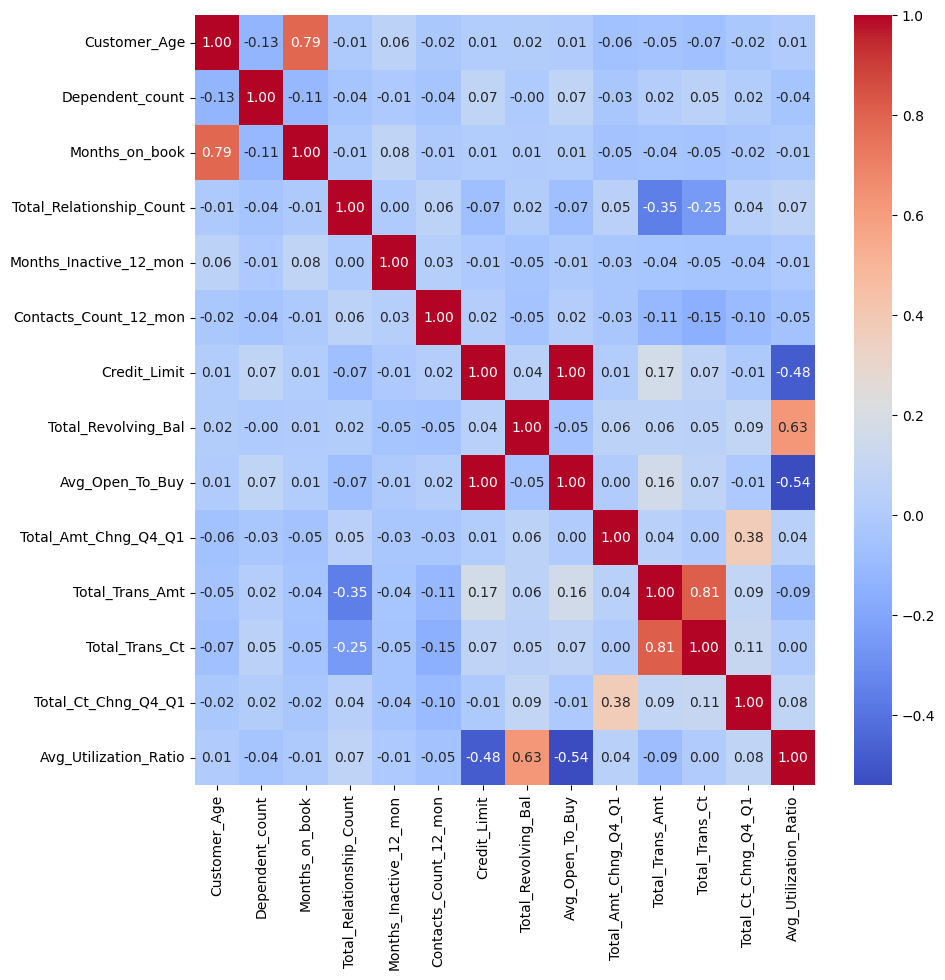

In [21]:
plt.figure( figsize=(10, 10) )

# annot=True -- показывать коэффициент корреляции
# cmap='coolwarm' -- цветовая схема
# fmt=".2f" -- формат вывода цифр
sb.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

### Попарные диаграммы рассеивания

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     9015 non-null   object 
 1   Customer_Age              9015 non-null   int64  
 2   Gender                    9015 non-null   object 
 3   Dependent_count           9015 non-null   int64  
 4   Education_Level           9015 non-null   object 
 5   Marital_Status            9015 non-null   object 
 6   Income_Category           9015 non-null   object 
 7   Card_Category             9015 non-null   object 
 8   Months_on_book            9015 non-null   int64  
 9   Total_Relationship_Count  9015 non-null   int64  
 10  Months_Inactive_12_mon    9015 non-null   int64  
 11  Contacts_Count_12_mon     9015 non-null   int64  
 12  Credit_Limit              9015 non-null   float64
 13  Total_Revolving_Bal       9015 non-null   int64  
 14  Avg_Ope

In [23]:
pairplot_data = data.drop(columns=[
    'Dependent_count', 
    'Months_Inactive_12_mon', 
    'Contacts_Count_12_mon',
    'Total_Relationship_Count',
    'Total_Amt_Chng_Q4_Q1',
    'Total_Ct_Chng_Q4_Q1' ])

CPU times: user 22.4 s, sys: 1.67 s, total: 24.1 s
Wall time: 30.1 s


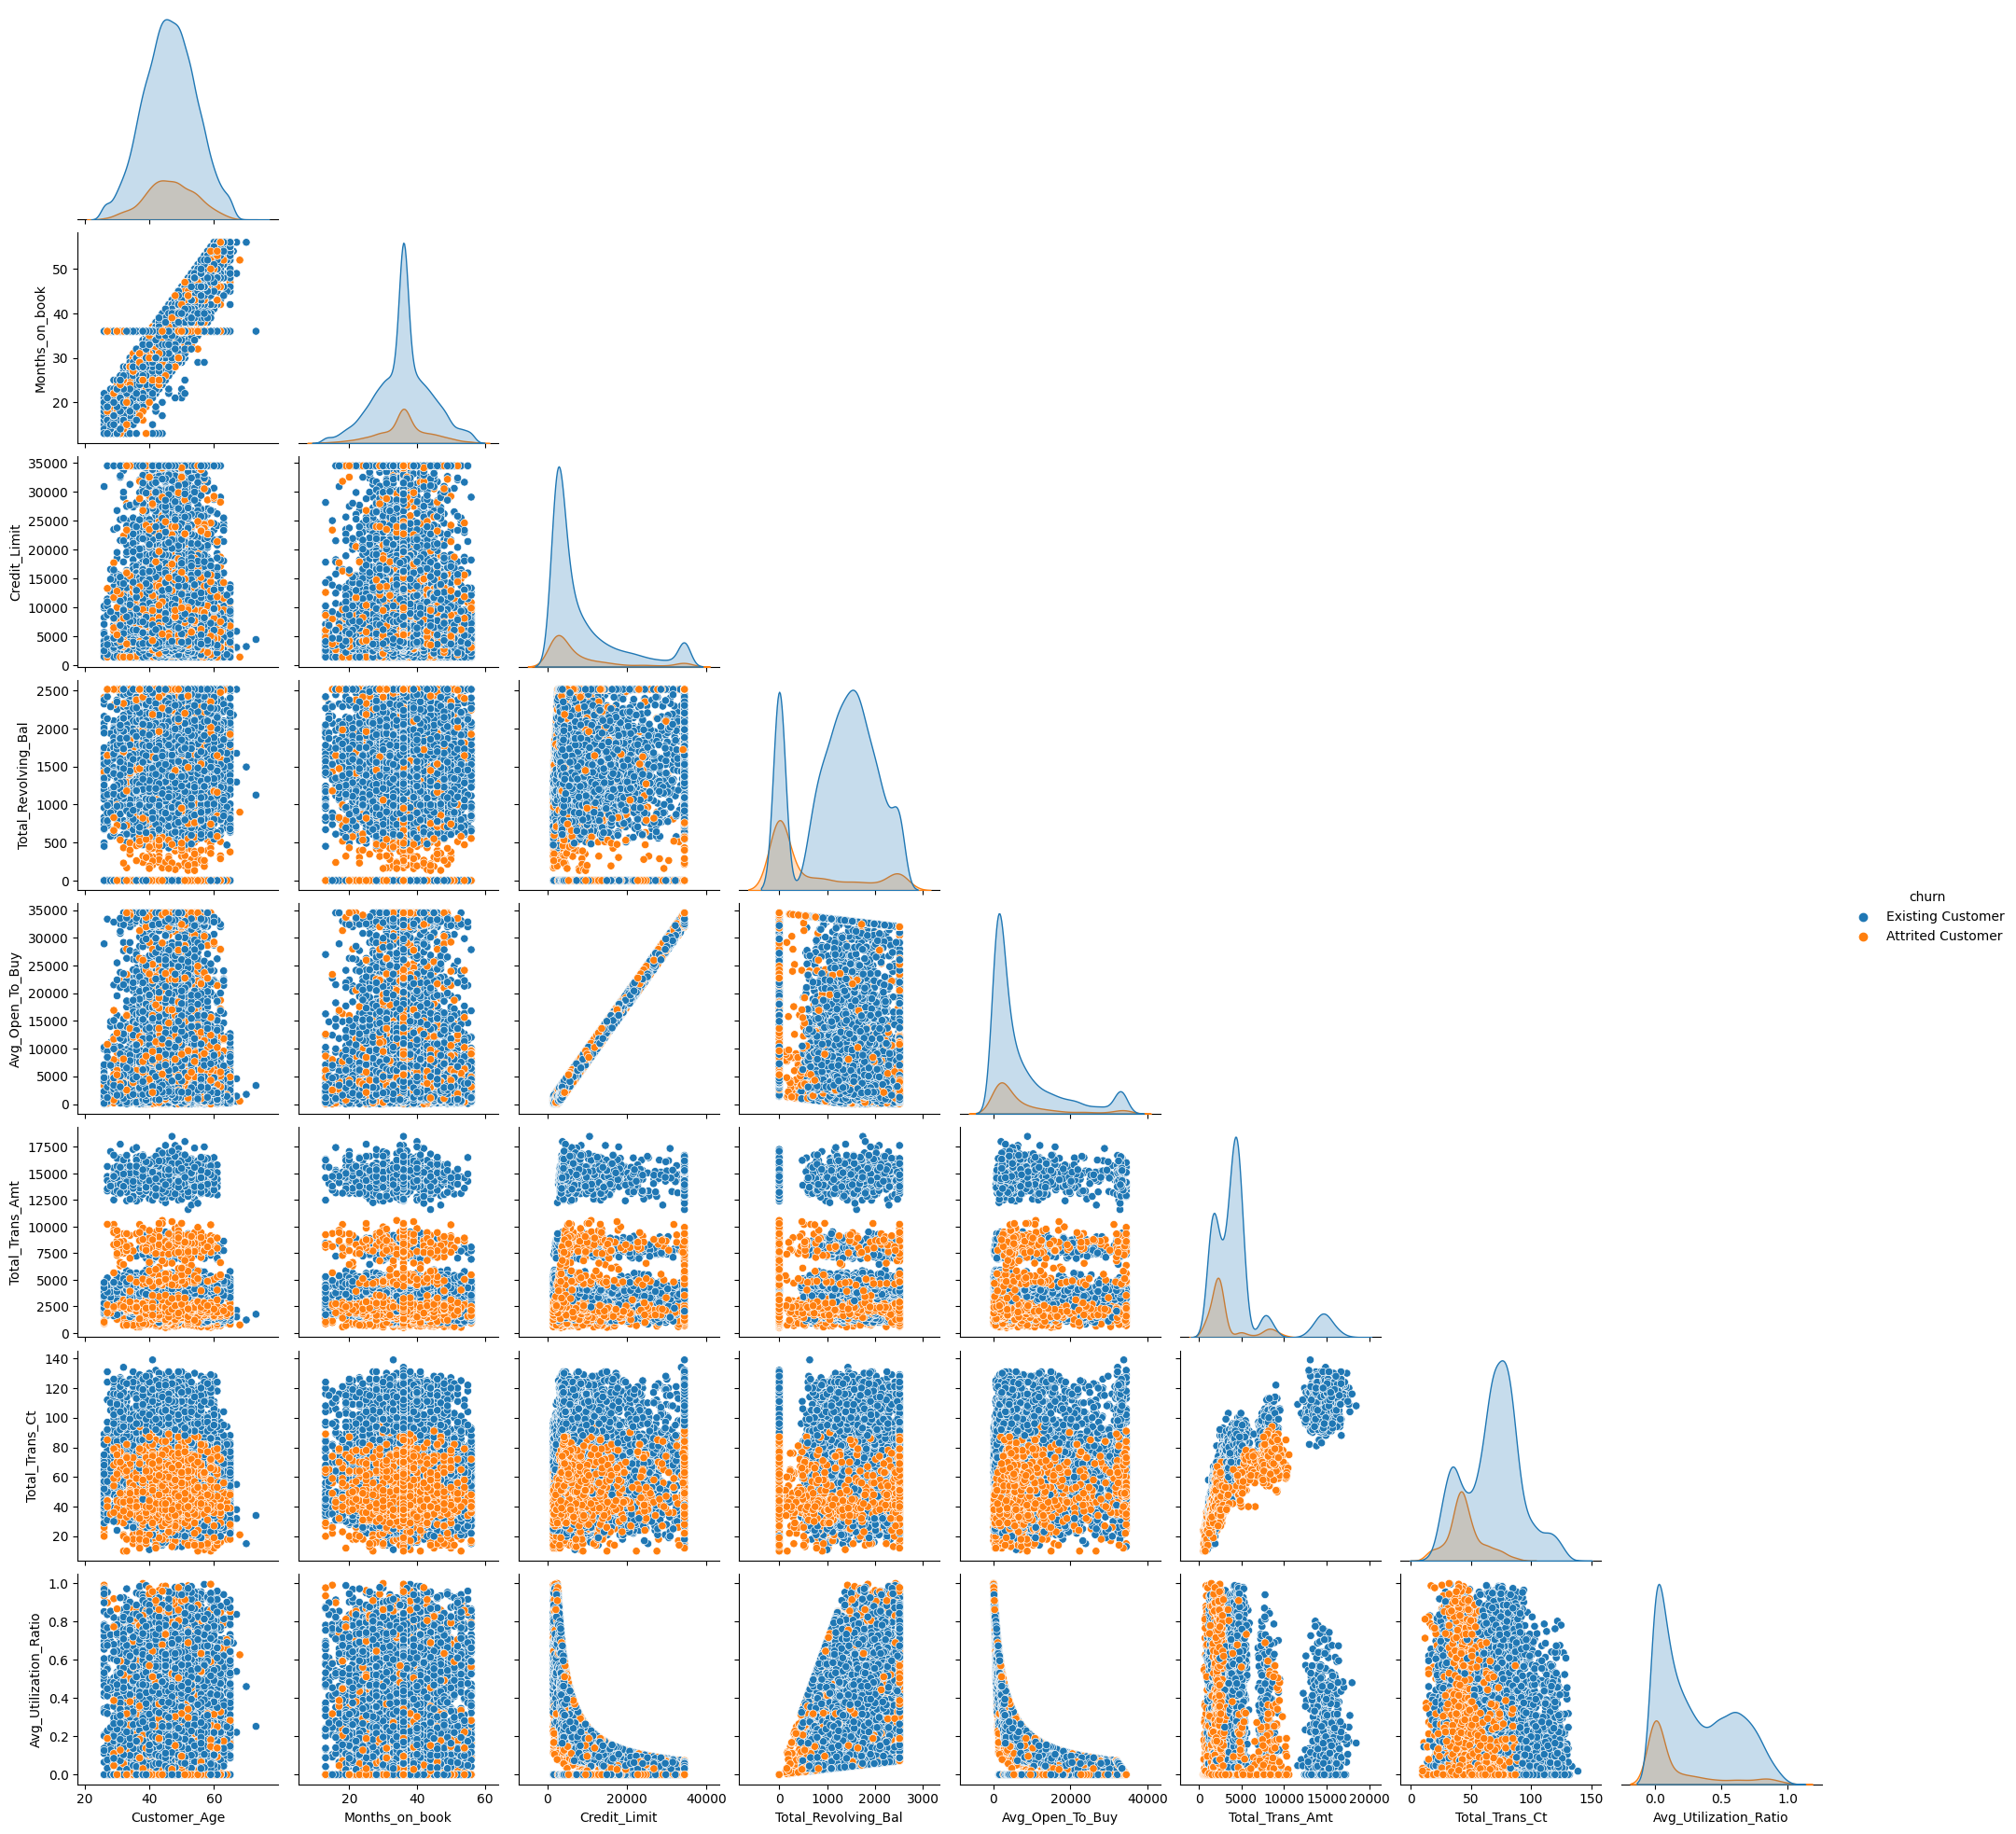

In [24]:
# визуальный анализ выбросов и зависимостей
# hue - подсветка цветом
# corner - построит только нижнюю диагональ
%time sb.pairplot(pairplot_data, hue='churn', corner=True)

### Диаграмма размаха

<Axes: >

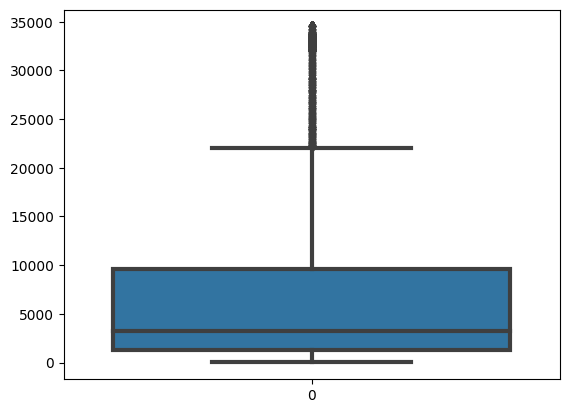

In [25]:
sb.boxplot(data_enc['Avg_Open_To_Buy'].values, linewidth=3)

Видим незначительные выбросы свыше 22500

## Балансировка

При использовании алгоритма машинного обучения очень важно обучить модель на наборе данных с почти таким же количеством выборок. Это называется сбалансированным классом. 

Нам нужны сбалансированные классы для обучения модели, но, если классы не сбалансированы, нам нужно использовать метод балансировки классов перед использованием алгоритма машинного обучения.

In [26]:
# выборка только из нулей (клиент ушёл)
data_zero = data_enc[ data_enc['churn'] == 0 ]
zero_values_count = data_zero['churn'].count()

# выборка только из единиц (клиент остался)
data_one = data_enc[ data_enc['churn'] == 1 ]
one_values_count = data_one['churn'].count()

print("С нулями:", zero_values_count)
print("С единицами:", one_values_count)

С нулями: 1440
С единицами: 7575


In [27]:
# взятие записей из единиц и объединение с нулями
data_one = data_one.sample(3000, random_state = 47)
data_balance = data_one.append(data_zero)
data_balance

<ipython-input-27-a093f847d69f>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_balance = data_one.append(data_zero)


,churn,Customer_Age,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown
794,1,36,3,0,0,23,6,2,1,2410.0,...,0,1,0,0,0,0,0,1,0,0
3842,1,56,1,0,0,43,3,2,2,2923.0,...,0,1,0,0,0,0,1,0,0,0
2087,1,37,2,4,0,24,4,2,2,3497.0,...,0,0,0,0,0,0,1,0,0,0
7490,1,42,3,0,0,35,5,2,1,2563.0,...,0,1,0,0,0,0,1,0,0,0
3291,1,54,1,0,1,47,6,3,4,12873.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10118,0,50,1,3,0,36,6,3,4,9959.0,...,0,0,1,0,0,0,0,0,0,1
10123,0,41,2,1,0,25,4,2,3,4277.0,...,0,0,0,0,0,0,0,0,0,1
10124,0,44,1,0,0,36,5,3,4,5409.0,...,1,0,0,0,0,0,1,0,0,0
10125,0,30,2,1,0,36,4,3,3,5281.0,...,0,0,1,0,0,1,0,0,0,0


# Логистическая регрессия

**Логистическая регрессия** — одно из статистических методов классификации с использованием линейного дискриминанта Фишера.

Механизм обучения логистической регрессии старается максимизировать среднее значение $g(x)$ (метод максимального правдоподобия).

**Уравнение логистической регрессии:**

$$ \hat y = \frac{1}{1+e^{−s}} $$

$$ s = b_0 + x_1 b_1 + ... + x_n b_n $$

где
$\hat y$ — вероятность принадлежности нулевому классу;

$e$ — основание натуральных логарифмов 2,71…;

$s$ — стандартное уравнение регрессии.

## Разбиение на Train и Test

In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    data_balance,       # сбалансированные данные
    random_state = 42,  # берём случайные данные
    test_size = 0.2 )   # 20% тестовых данных от общего кол-ва

print('Train shape', train.shape)
print('Test shape', test.shape)

Train shape (3552, 30)
Test shape (888, 30)


## Стандартизация

**Нормализация или стандартизация** -- приведенние разных признаков к одной шкале, с одним и тем же масштабом.

Нормализация нужна чтобы уравнять относительную значимость признаков перед применением моделей машинного обучения. 
Например в линейной регресии признаки с большим диапазоном значений, например 0-500 могут влиять на результат сильнее, чем признаки с диапазоном значений 1-80. Хотя важность признака должна определятся исследователем и моделью.

Нормализация vs стандартизация
- стандартизиция $ X' = \frac{X - \bar X} {\sigma_X} $
  - после стандартизации: $\bar{X'} = 0$, &nbsp; $\sigma_{X'} = 1$
  - отлично подходит для нормально распределённых признаков
  - преобразование слабо зависит от выбросов
- нормальзация $ X' = \frac{X-X_{min}}{X_{max} - X_{min}}$
    - после нормализации: $ X_{min}^{'} = 0$, &nbsp; $ X_{max}^{'} = 1$
    - полходяит когда распределение признака неизвестно
    - зависит от выбросов

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = train.drop(columns='churn')
X_test = test.drop(columns='churn')

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = train['churn']
y_test = test['churn']

## Обучение тренировочной выборки

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 10000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [31]:
lr.coef_

array([[ 9.29037540e-02, -1.43728731e-01, -2.27107904e-01,
        -9.95091746e-02,  2.04537573e-02,  6.41734262e-01,
        -4.65797792e-01, -5.80096031e-01,  7.34404861e-02,
         7.44697709e-01,  3.75356930e-03,  9.90473250e-02,
        -1.66060012e+00,  2.88836389e+00,  6.28823985e-01,
         1.14387703e-01, -2.62011144e-01,  2.62011144e-01,
        -8.35641263e-03,  1.43381848e-01, -1.05482831e-01,
        -6.67914807e-02, -2.67378800e-02, -9.30050235e-02,
         5.47253084e-02,  3.52710038e-02, -4.36142327e-02,
        -5.87654114e-03, -2.00196598e-03]])

In [32]:
lr.predict_proba(X_train) # софтмакс

array([[2.06457364e-02, 9.79354264e-01],
       [7.10136526e-02, 9.28986347e-01],
       [1.63029164e-01, 8.36970836e-01],
       ...,
       [9.65942391e-01, 3.40576090e-02],
       [6.85506534e-01, 3.14493466e-01],
       [7.34730280e-04, 9.99265270e-01]])

In [33]:
y_pred = lr.predict(X_train)

In [34]:
lr.score(X_train, y_train)

0.8637387387387387

## Проверка на тестовой выборке

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_test_pred = lr.predict(X_test)
print( classification_report(y_test, y_test_pred, digits=4) )

LogReg = accuracy_score(y_test, y_test_pred)

              precision    recall  f1-score   support

           0     0.7619    0.7500    0.7559       256
           1     0.8994    0.9051    0.9022       632

    accuracy                         0.8604       888
   macro avg     0.8306    0.8275    0.8291       888
weighted avg     0.8597    0.8604    0.8600       888



# SVM

**Метод опорных векторов** (Support Vector Machines — SVM) — это набор контролируемых методов обучения, используемых для классификации, регрессии и обнаружения выбросов.

$$ \sum_{i \in SV}(\alpha_i — \alpha_i^*) K(x_i, x) + b $$

**Преимущества:**

- Эффективен в пространствах больших размеров.
По-прежнему эффективен в случаях, когда количество измерений превышает количество образцов.
- Использует подмножество обучающих точек в функции принятия решений (называемых опорными векторами), поэтому это также эффективно с точки зрения памяти.
- Универсальность: для функции принятия решения могут быть указаны различные функции ядра. Предоставляются общие ядра, но также можно указать собственные ядра.

**К недостаткам опорных векторных машин можно отнести:**

- Если количество функций намного превышает количество выборок, избегайте чрезмерной подгонки при выборе функций ядра, и термин регуляризации имеет решающее значение.
- SVM не предоставляют напрямую оценки вероятностей, они рассчитываются с использованием дорогостоящей пятикратной перекрестной проверки.

![](https://miro.medium.com/v2/resize:fit:921/1*06GSco3ItM3gwW2scY6Tmg.png)


In [36]:
from sklearn.svm import SVC # support vectors classifier

svm = SVC(C=4, kernel='rbf', random_state=42, probability=True)
# probability - включить ли оценки вероятности
svm.fit(X_train, y_train)

y_test_pred = svm.predict(X_test)
print( classification_report(y_test, y_test_pred, digits=4) )

              precision    recall  f1-score   support

           0     0.8235    0.8203    0.8219       256
           1     0.9273    0.9288    0.9281       632

    accuracy                         0.8975       888
   macro avg     0.8754    0.8746    0.8750       888
weighted avg     0.8974    0.8975    0.8975       888



In [37]:
SVM = accuracy_score( y_test, y_test_pred)
SVM

0.8975225225225225

## GridSearch

In [38]:
svm.get_params()

{'C': 4,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [39]:
from sklearn.model_selection import GridSearchCV
# класс для подбора гипепараметров моделей (с кросс-валидацией - CV)

svm_gs = GridSearchCV( estimator= svm, # модель
                       param_grid={
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'C': [1,2,10] },  # значения параметров для перебора
                       scoring='accuracy', # название метрики качества или функция её возвращающая
                       cv=None, # количество разбиений для кросс-валидации None = 5
                       n_jobs=-1 ) # подбирать параллельно

svm_gs.fit( X_train, y_train )

GridSearchCV(estimator=SVC(C=4, probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [1, 2, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [40]:
print( "Лучшие параметры", svm_gs.best_params_ )
print( f"Accuracy: {svm_gs.best_score_:.4f}")

Лучшие параметры {'C': 2, 'kernel': 'rbf'}
Accuracy: 0.8916


In [41]:
SVM_gs = svm_gs.best_score_
SVM_gs

0.8916142707157148

# KNN

KNN (k Nearest Neighbours) - это метод решения задач классификации и задач регрессии, основанный на поиске ближайших объектов с известными значениями целевой переменной.

![](https://miro.medium.com/v2/resize:fit:587/1*hncgU7vWLBsRvc8WJhxlkQ.png)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier( n_neighbors=11,
                            weights='uniform',      # веса всех точек одинаковы; 
                                                    # distance - вес точки обратно пропорционален расстоянию
                                                    # callable - функция, определяющая вес точки
                           p = 1,                   # номер нормы для вычисления расстояния 
                                                    # 1 - L1, 2 - L2 - частные случаи расстояния Минковского
                           metric = 'minkowski' )   # способ вычисления расстояния

knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
print( classification_report(y_test, y_test_pred, digits=4) )

              precision    recall  f1-score   support

           0     0.8256    0.6289    0.7140       256
           1     0.8629    0.9462    0.9026       632

    accuracy                         0.8547       888
   macro avg     0.8443    0.7876    0.8083       888
weighted avg     0.8522    0.8547    0.8482       888



In [43]:
KNN = accuracy_score(y_test, y_test_pred)
KNN

0.8547297297297297

## GridSearch

In [44]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 1,
 'weights': 'uniform'}

In [45]:
from sklearn.model_selection import GridSearchCV
# класс для подбора гипепараметров моделей (с кросс-валидацией - CV)

knn_gs = GridSearchCV( estimator= knn, # модель
                       param_grid={
                          'n_neighbors': range(1,11),
                          'weights': ['distance','uniform'],
                          'p': [1,2],
                          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                       },  # значения параметров для перебора
                       scoring='accuracy', # название метрики качества или функция её возвращающая
                       cv = None, # количество разбиений для кросс-валидации None = 5
                       n_jobs=-1 ) # подбирать параллельно

knn_gs.fit( X_train, y_train )

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=11, p=1), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(1, 11), 'p': [1, 2],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy')

In [46]:
print( "Лучшие параметры", knn_gs.best_params_ )
print( f"Accuracy {knn_gs.best_score_:.4f}")

Лучшие параметры {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Accuracy 0.8390


In [47]:
KNN_gs = knn_gs.best_score_
KNN_gs

0.8389631742635842

In [48]:
knn2 = KNeighborsClassifier( n_neighbors=11,          
                            weights='distance',                                                                                                        
                           p = 1,
                           algorithm = 'auto',                                                                       
                           metric = 'minkowski'                                                      
                        )

In [49]:
knn2.fit(X_train, y_train)

y_test_pred = knn2.predict( X_test )
print( classification_report( y_test, y_test_pred, digits=4 ) )

              precision    recall  f1-score   support

           0     0.8333    0.6445    0.7269       256
           1     0.8681    0.9478    0.9062       632

    accuracy                         0.8604       888
   macro avg     0.8507    0.7962    0.8165       888
weighted avg     0.8581    0.8604    0.8545       888



# Наивный Байес

Наивные байесовские методы представляют собой набор алгоритмов обучения с учителем, основанных на применении теоремы Байеса с «наивным» предположением об условной независимости между каждой парой признаков при заданном значении переменной класса.

## Гаусс

Модель Гаусса предполагает, что все признаки попадают в нормальное распределение. Это означает, что если предикторы принимают непрерывные значения вместо дискретных, то модель предполагает, что эти значения взяты из распределения Гаусса.

$$
P(x_i | y) = \dfrac{1}{\sqrt{2 \pi \sigma^2_y}} \exp (- \dfrac{(x_i - \mu_y)^2}{2\sigma^2_y})
$$

Параметры $\sigma_y$ и $\mu_y$ оцениваются по методу максимального правдоподобия

In [50]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)

print( classification_report(y_test, y_test_pred) )

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       256
           1       0.88      0.84      0.86       632

    accuracy                           0.81       888
   macro avg       0.76      0.78      0.77       888
weighted avg       0.81      0.81      0.81       888



In [51]:
GaussianNB_Acc = accuracy_score(y_test, y_test_pred)
GaussianNB_Acc

0.8051801801801802

## Бернулли

Классификатор Бернулли работает аналогично полиномиальному классификатору, но переменные-предикторы являются независимыми булевыми переменными. Например, если конкретное слово присутствует или нет в документе. Эта модель также известна задачами классификации документов. Правило в теореме Бернулиса будет

$$
P(x_i | y) = P(i | y)x_i + (1 - P(i | y))(1 - x_i)
$$

In [52]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_test_pred = bnb.predict(X_test)

print( classification_report(y_test, y_test_pred) )

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       256
           1       0.88      0.87      0.87       632

    accuracy                           0.82       888
   macro avg       0.78      0.79      0.78       888
weighted avg       0.82      0.82      0.82       888



In [53]:
BernoulliNB_Acc = accuracy_score(y_test, y_test_pred)
BernoulliNB_Acc

0.8220720720720721

## GridSearch

In [54]:
bnb.get_params()

{'alpha': 1.0,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn'}

In [55]:
from sklearn.model_selection import GridSearchCV
# класс для подбора гипепараметров моделей (с кросс-валидацией - CV)

nb_gs = GridSearchCV( estimator= bnb, # модель
                       param_grid= {'force_alpha':[True, False, 'warn'],
                                    'alpha':np.linspace(0.0, 1.0, num=10),
                                    'binarize':np.linspace(0.0, 1.0, num=10),
                                    },  # значения параметров для перебора
                       scoring='accuracy', # название метрики качества или функция её возвращающая
                       cv = None, # количество разбиений для кросс-валидации None = 5
                       n_jobs=-1) # подбирать параллельно

nb_gs.fit( X_train, y_train )

GridSearchCV(estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'binarize': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'force_alpha': [True, False, 'warn']},
             scoring='accuracy')

In [56]:
print( "Лучшие параметры", nb_gs.best_params_ )
print( f"Лучшая общая точность (accuracy) {nb_gs.best_score_:.4f}")

BernoulliNB_gs = nb_gs.best_score_

Лучшие параметры {'alpha': 0.6666666666666666, 'binarize': 0.1111111111111111, 'force_alpha': True}
Лучшая общая точность (accuracy) 0.8263


# Полиномиальные признаки

Эти признаки, представляющие собой комбинацию нескольких отдельных переменных, называются условиями взаимодействия, поскольку они фиксируют взаимодействия между переменными.

Например, если входная выборка является двумерной и имеет форму $[a, b]$, полиномиальные признаки степени 2 будут $[1, a, b, a^2, ab, b^2]$.

## Логистическая регрессия

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly.shape

(3552, 464)

In [58]:
lr = LogisticRegression(max_iter = 5000, random_state=42)
lr.fit(X_poly, y_train)

LogReg_Poly = lr.score(poly.transform(X_test), y_test)
LogReg_Poly

0.8997747747747747

## SVM

In [59]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)

svm_Poly = SVC(random_state=47)
svm_Poly.fit(X_poly, y_train)

SVM_PolyAcc = svm_Poly.score(poly.transform(X_test), y_test)
SVM_PolyAcc

0.8727477477477478

# Одиночное дерево

**Дерево решений** (Decision Trees) — это один из алгоритмов машинного обучения, основанный на правиле: «Если <условие>, то <ожидаемый результат>».

![](https://loginom.ru/sites/default/files/blogpost-files/activation-function.svg)

Это непараметрический контролируемый метод обучения, используемый для классификации и регрессии. 

Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной, изучая простые правила принятия решений, выведенные из характеристик данных. Дерево можно рассматривать как кусочно-постоянное приближение.

Например, в приведенном ниже примере деревья решений учатся на основе данных аппроксимировать синусоиду набором правил принятия решений «если-то-иначе». Чем глубже дерево, тем сложнее правила принятия решений и тем точнее модель.

In [60]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth = 5, random_state = 42)
# - criterion{“gini”, “entropy”, “log_loss”} — критерий качества правила разделения в узле
# - max_depth — максимальная глубина, задаёт регуляризацию, т.е. помогает избежать переобучения; 
#   меньше глубина — меньше шансов на переобучение
# - min_samples_split — если в узле обхектов меньше чем заданное, то узел становится листом
# class_weightdict, list of dict or “balanced”, default=None — веса классов (если они не сбалансированы)

dt.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=5, random_state=42)

In [61]:
print("Test")
print( classification_report(y_test, dt.predict(X_test), digits=4))

Test
              precision    recall  f1-score   support

           0     0.8188    0.8828    0.8496       256
           1     0.9510    0.9209    0.9357       632

    accuracy                         0.9099       888
   macro avg     0.8849    0.9018    0.8927       888
weighted avg     0.9129    0.9099    0.9109       888



In [62]:
Tree1 = accuracy_score( y_test, dt.predict(X_test))
Tree1

0.9099099099099099

# Беггинг

При бэггинге используется следующий метод:

- Возьмите $b$ образцов с начальной загрузкой из исходного набора данных.

  - Напомним, что бутстрепная выборка — это выборка исходного набора данных, в которой наблюдения берутся с заменой.
- Постройте дерево решений для каждого загруженного образца.

- Усредните прогнозы каждого дерева, чтобы получить окончательную модель.

  - Для деревьев регрессии мы берем среднее значение прогноза, сделанного $B$-деревьями.

  - Для деревьев классификации мы берем наиболее часто встречающееся предсказание, сделанное $B$-деревьями.

  Он особенно полезен для деревьев решений, потому что они по своей природе имеют высокую дисперсию, а бэггинг может значительно уменьшить дисперсию, что приводит к меньшей ошибке теста.

In [63]:
from sklearn.ensemble import BaggingClassifier

bagging_m = BaggingClassifier( tree.DecisionTreeClassifier( max_depth = 5, random_state=42 ),
                               n_estimators = 10,
                               n_jobs = -1 )

bagging_m.fit(X_train, y_train)
print(classification_report( y_test, bagging_m.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8626    0.8828    0.8726       256
           1     0.9521    0.9430    0.9475       632

    accuracy                         0.9257       888
   macro avg     0.9073    0.9129    0.9101       888
weighted avg     0.9263    0.9257    0.9259       888



In [64]:
Begging = accuracy_score( y_test, bagging_m.predict(X_test))
Begging

0.9256756756756757

# Случайный лес

**Случайный лес** — модель, состоящая из множества деревьев решений. 

Вместо того,чтобы просто усреднять прогнозы разных деревьев (такая концепция называется просто «лес»), эта модель использует две ключевые концепции, которые и делают этот лес случайным:
- Случайная выборка образцов из набора данных при построении деревьев.
- При разделении узлов выбираются случайные наборы параметров.

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=47)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=47)

In [66]:
print(classification_report( y_test, rfc.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9200    0.8984    0.9091       256
           1     0.9592    0.9684    0.9638       632

    accuracy                         0.9482       888
   macro avg     0.9396    0.9334    0.9364       888
weighted avg     0.9479    0.9482    0.9480       888



In [67]:
RandomForrestResult = accuracy_score( y_test, rfc.predict(X_test))
RandomForrestResult

0.9481981981981982

# Voting

**Голосование** — ансамблевый алгоритм машинного обучения. 

В классификации ансамбль **жесткого** голосования включает суммирование голосов за четкие метки классов из других моделей и прогнозирование класса с наибольшим количеством голосов. 

Ансамбль **мягкого** голосования включает суммирование прогнозируемых вероятностей для меток классов и прогнозирование метки класса с наибольшей суммарной вероятностью.

Регрессор голосования — это ансамблевая метаоценка, которая соответствует нескольким базовым регрессорам, каждому из которых соответствует весь набор данных. Затем он **усредняет отдельные прогнозы, чтобы сформировать окончательный прогноз**.

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

from sklearn.ensemble import VotingClassifier

models = [('Tree', dt ),        
          ('Bagging', bagging_m ),
          ('RFC', rfc )]   

voting_m = VotingClassifier( estimators=models, voting='soft')
voting_m.fit(X_train, y_train)

print(classification_report( y_test, voting_m.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8784    0.8750    0.8767       256
           1     0.9494    0.9509    0.9502       632

    accuracy                         0.9291       888
   macro avg     0.9139    0.9130    0.9135       888
weighted avg     0.9290    0.9291    0.9290       888



In [69]:
VotingRes = accuracy_score( y_test, bagging_m.predict(X_test))
VotingRes

0.9256756756756757

# Градиентный спуск

**Градиентный спуск** — метод нахождения минимального значения функции потерь (существует множество видов этой функции). 

Минимизация любой функции означает поиск самой глубокой впадины в этой функции. 

Поиск минимума означает получение наименьшей возможной ошибки или повышение точности модели.

Мы увеличиваем точность, перебирая набор учебных данных при настройке параметров нашей модели (весов и смещений).

![](https://hsto.org/web/2b5/5d6/90d/2b55d690d99e4ec0976b360aae6ce4df.jpg)

![](https://neurohive.io/wp-content/uploads/2018/11/minimum-funkcii-570x309.png)

**Стохастический градиентный спуск** отличается тем, что градиент оптимизируемой функции считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента.

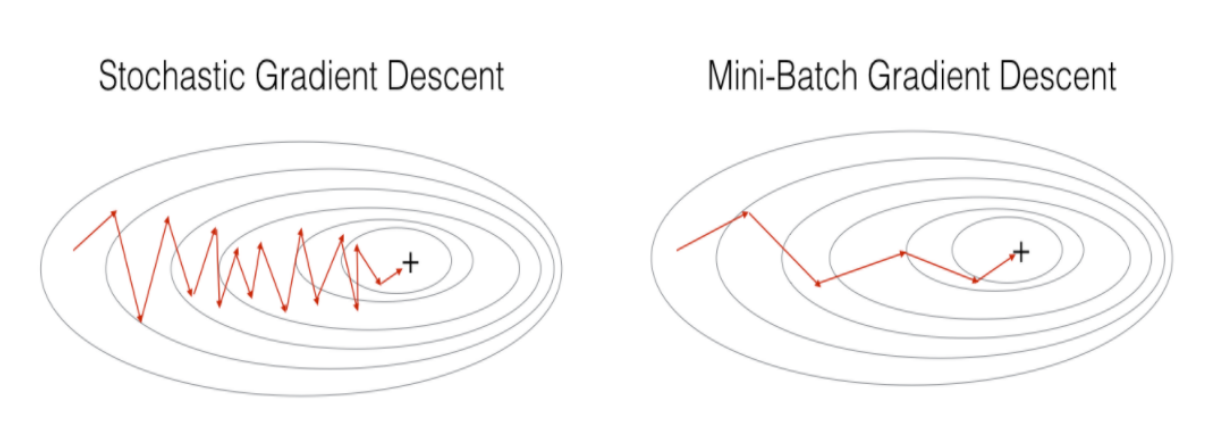

In [70]:
from sklearn.linear_model import SGDClassifier
# по-умолчанию используется линейный метод опорных векторов (SVM)

sgd_class = SGDClassifier(random_state = 42, learning_rate = 'optimal')
sgd_class.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [71]:
print(classification_report( y_test, sgd_class.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.6912    0.7344    0.7121       256
           1     0.8896    0.8671    0.8782       632

    accuracy                         0.8288       888
   macro avg     0.7904    0.8007    0.7952       888
weighted avg     0.8324    0.8288    0.8303       888



In [72]:
sgdRes = accuracy_score( y_test, sgd_class.predict(X_test))
sgdRes

0.8288288288288288

# Градиентный бустинг

**Градиентный бустинг** – алгоритм машинного обучения для решения задач классификации и регрессии. 

Он строит предсказание в виде ансамбля слабых предсказывающих моделей, которыми в основном являются **деревья решений**. 

Из нескольких слабых моделей в итоге мы собираем одну, но уже эффективную. 

Общая идея алгоритма – последовательное применение предиктора (предсказателя) таким образом, что каждая последующая модель сводит ошибку предыдущей к минимуму.

![](https://neurohive.io/wp-content/uploads/2018/11/predskazanija-gradientnogo-bustinga-496x570.png)

![](https://neurohive.io/wp-content/uploads/2018/11/vizualizacija-gradientnogo-bustinga-570x226.png)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=100,
                                learning_rate=0.1,
                                max_depth=5,
                                random_state = 42)

GBC.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [74]:
print(classification_report( y_test, GBC.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.9286    0.9141    0.9213       256
           1     0.9654    0.9715    0.9685       632

    accuracy                         0.9550       888
   macro avg     0.9470    0.9428    0.9449       888
weighted avg     0.9548    0.9550    0.9548       888



In [75]:
BoostRes = accuracy_score( y_test, GBC.predict(X_test))
BoostRes

0.954954954954955

# Стэкинг

**Стекинг** (Stacked Generalization или Stacking) — один из самых популярных способов ансамблирования алгоритмов, т.е. использования нескольких алгоритмов для решения одной задачи машинного обучения.

Известно, что если обучить несколько разных алгоритмов, то в задаче регрессии их среднее, а в задаче классификации — голосование по большинству, часто превосходят по качеству все эти алгоритмы.

![](https://media.geeksforgeeks.org/wp-content/uploads/20200713234827/mlxtend.PNG)

In [76]:
from sklearn.ensemble import StackingClassifier

models = [('kNN', knn ),        
          ('Tree', dt ),
          ('Bagging', bagging_m ),
          ('Grad', sgd_class)]

stk = StackingClassifier( estimators=models, final_estimator=GBC)
stk.fit(X_train, y_train)

StackingClassifier(estimators=[('kNN',
                                KNeighborsClassifier(n_neighbors=11, p=1)),
                               ('Tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       random_state=42)),
                               ('Bagging',
                                BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                   random_state=42),
                                                  n_jobs=-1)),
                               ('Grad', SGDClassifier(random_state=42))],
                   final_estimator=GradientBoostingClassifier(max_depth=5,
                                                              random_state=42))

In [77]:
print(classification_report( y_test, stk.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8661    0.8594    0.8627       256
           1     0.9432    0.9462    0.9447       632

    accuracy                         0.9212       888
   macro avg     0.9047    0.9028    0.9037       888
weighted avg     0.9210    0.9212    0.9211       888



In [78]:
StackRes = accuracy_score( y_test, stk.predict(X_test))
StackRes

0.9211711711711712

# Нейросеть

![](https://proproprogs.ru/htm/neural_network/files/struktura-i-princip-raboty-polnosvyaznyh-neyronnyh-setey.files/image001.png)

In [101]:
X = data_balance.drop(columns='churn')
Y = data_balance['churn']

In [102]:
print(X.shape)
print(Y.shape)
data_balance.head()

(4440, 29)
(4440,)


,churn,Customer_Age,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown
794,1,36,3,0,0,23,6,2,1,2410.0,...,0,1,0,0,0,0,0,1,0,0
3842,1,56,1,0,0,43,3,2,2,2923.0,...,0,1,0,0,0,0,1,0,0,0
2087,1,37,2,4,0,24,4,2,2,3497.0,...,0,0,0,0,0,0,1,0,0,0
7490,1,42,3,0,0,35,5,2,1,2563.0,...,0,1,0,0,0,0,1,0,0,0
3291,1,54,1,0,1,47,6,3,4,12873.0,...,0,1,0,0,0,1,0,0,0,0


In [103]:
# разделим на обучающую тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# от тестовой выборки отделим небольшую валидационную выборку, 
# используем её чтобы отслеживать качество предсказания прямо во время обучения нейросети
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25)

print(f"Train: {X_train.shape}")
print(f"Test:  {X_test.shape}")
print(f"Val:   {X_val.shape}")

Train: (3552, 29)
Test:  (666, 29)
Val:   (222, 29)


In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552 entries, 5459 to 4356
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_Age                   3552 non-null   int64  
 1   Dependent_count                3552 non-null   int64  
 2   Income_Category                3552 non-null   int64  
 3   Card_Category                  3552 non-null   int64  
 4   Months_on_book                 3552 non-null   int64  
 5   Total_Relationship_Count       3552 non-null   int64  
 6   Months_Inactive_12_mon         3552 non-null   int64  
 7   Contacts_Count_12_mon          3552 non-null   int64  
 8   Credit_Limit                   3552 non-null   float64
 9   Total_Revolving_Bal            3552 non-null   int64  
 10  Avg_Open_To_Buy                3552 non-null   float64
 11  Total_Amt_Chng_Q4_Q1           3552 non-null   float64
 12  Total_Trans_Amt                3552 non-null 

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #Стандартизация Тренировочной выборки
X_test = scaler.transform(X_test)   #Стандартизация Тестовой выборки
X_val = scaler.transform(X_val)     #Стандартизация Валидационной выборки

In [106]:
import tensorflow as tf

from keras.models import Sequential       # основной класс для последовательного соединения слоёв
from keras.layers import Dense            # полносвязный слой (каждый нейрон в этом слое будет соединён с каждым в соседнем)
from keras import metrics                 # метрики качества

from tensorflow.keras.optimizers import Adam         # класс для подбора параметров нейросети (модификация градиентного пуска)
from tensorflow.keras.utils import to_categorical    # для one-hot кодирования

In [107]:
# keras хочет на выходе видеть классы в one-hot
# поэтому подготовим данные
y_train11 = to_categorical(y_train)
y_test11  = to_categorical(y_test)
y_val11  = to_categorical(y_val)
# [0,  -> [1,0,0]
# [1,  -> [0,1,0]
# [2,  -> [0,0,1]

In [108]:
model = Sequential()     

model.add( Dense(50, input_dim=29, activation='sigmoid')) # первый слой (не считая входного)
                                                          # 10 -- число нейронов
                                                          # input_dim=4 -- число входов для каждого нейрона = число признаков
                                                          # activation='relu' -- функция активации
model.add( Dense(10, input_dim = 50, activation='sigmoid'))

model.add( Dense(2, input_dim = 10, activation='sigmoid') ) # выходной слой. число входов каждого нейрона расчитвыается автоматически. 
                                      # оно равно числу нейронов в предыдущем слое
                                      # каждый из трёх нейронов этого слоя отвечает за узнавание своего класса и выдаёт число от 0 до 1 (активация -- сигмоида)

opt = Adam(learning_rate=0.01)   # объект для подбора параметров модели градиентным спуском
                                 # learning_rate -- коэффициент шага изменения параметров нейросети
# большой шаг -- быстрое обучение, но грубый подбор параметров
# маленький шаг -- медленное обучение, но точный подбор параметров

# завершающий этап созданий нейросети
model.compile(loss='categorical_crossentropy',  # функция потерь
              optimizer=opt,                            
              metrics=['accuracy'])             # метрики, которые нужно вычислять в конце каждой эпохи                       

model.summary()   # выводит на экран информацию о сети

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                1500      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 2,032
Trainable params: 2,032
Non-trainable params: 0
_________________________________________________________________


In [109]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


# далее применение и обучение модели
with tf.device('/device:GPU:0'):
    # обучение
    model.fit(X_train, y_train11, 
            validation_data = (X_val, y_val11),     # необязательный параметр -- валидационная выборка (для контроля переобучения)
            epochs=152,                     # число эпох -- число прогонов всей обучающей выборки
            batch_size=X_train.shape[0],    # размер одной порции данных (батча), после которой будут меняться коэффициенты
                                            # здесь зададим размер равный всей обучающей выборке
            )

# лучше выбирать максимально возможный размер батча, т.е. такой который помещается в оперативную память
# но если один проход обучения занимает млишком много времени и трудно контролировать переобучение,
# то размер стоит уменьшить

Found GPU at: /device:GPU:0
Epoch 1/152
1/1 [==============================] - 1s 1s/step - loss: 0.7662 - accuracy: 0.3333 - val_loss: 0.6949 - val_accuracy: 0.4820
Epoch 2/152
1/1 [==============================] - 0s 37ms/step - loss: 0.6919 - accuracy: 0.5172 - val_loss: 0.6334 - val_accuracy: 0.7117
Epoch 3/152
1/1 [==============================] - 0s 34ms/step - loss: 0.6422 - accuracy: 0.6743 - val_loss: 0.5961 - val_accuracy: 0.7117
Epoch 4/152
1/1 [==============================] - 0s 31ms/step - loss: 0.6151 - accuracy: 0.6667 - val_loss: 0.5775 - val_accuracy: 0.7117
Epoch 5/152
1/1 [==============================] - 0s 33ms/step - loss: 0.6049 - accuracy: 0.6667 - val_loss: 0.5707 - val_accuracy: 0.7117
Epoch 6/152
1/1 [==============================] - 0s 32ms/step - loss: 0.6042 - accuracy: 0.6667 - val_loss: 0.5688 - val_accuracy: 0.7117
Epoch 7/152
1/1 [==============================] - 0s 33ms/step - loss: 0.6062 - accuracy: 0.6667 - val_loss: 0.5674 - val_accuracy: 0

In [110]:
# проверим качество модели на тестовой выборке

_, accuracy = model.evaluate(X_test, y_test11)  

print(f'Accuracy: {accuracy*100:.2f}')

21/21 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8649
Accuracy: 86.49


In [111]:
# проверим качество модели на валидационной выборке

_, accuracy = model.evaluate(X_val, y_val11)  

print(f'Accuracy: {accuracy*100:.2f}')

7/7 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8784
Accuracy: 87.84


# Таблица результатов

In [90]:
import pandas as pd

data = [['LogReg', LogReg, LogReg_Poly], 
        ['SVM', SVM, SVM_PolyAcc], 
        ['SVM_gs', SVM_gs, '-'],
        ['KNN', KNN, '-'],
        ['KNN_gs', KNN_gs, '-'],
        ['GaussianNB', GaussianNB_Acc, '-'],
        ['BernoulliNB', BernoulliNB_Acc, '-'],
        ['BernoulliNB_gs', BernoulliNB_gs, '-'],
        ['Tree', Tree1, '-'],
        ['Voting', VotingRes, '-'],
        ['Gradient', sgdRes, '-'],
        ['Boosting', BoostRes, '-'],
        ['RandomForest', RandomForrestResult, '-'],
        ['Stacking', StackRes, '-'],
        ['Begging', Begging, '-']] 
  
df = pd.DataFrame(data, columns=['Method', 'Accuracy', 'Acc Poly'])
  
df = df.round(4)
df.sort_values(by=['Accuracy'], ascending=False)

,Method,Accuracy,Acc Poly
11,Boosting,0.9550,-
12,RandomForest,0.9482,-
9,Voting,0.9257,-
14,Begging,0.9257,-
13,Stacking,0.9212,-
8,Tree,0.9099,-
1,SVM,0.8975,0.872748
2,SVM_gs,0.8916,-
0,LogReg,0.8604,0.899775
3,KNN,0.8547,-


# Выводы

Как видим в данной задаче отлично сработал **градиентный бустинг (0.9550)**, как и в задаче регрессии.

Также и **случайный лес** показал отличный результат (0.9482).

Далее идут голосование (0.9257), бэггинг (0.9257) и стэккинг (0.9212) с примерно одинаковой точностью.

Наивные байесы в очередной раз показали одни из худших результатов, однако в этот раз он всё ещё остаётся хорошим.

- Гаусс (0.8221)
- Бернулли (0.8052)

Нейросеть в сравнении с другими алгоритмами показала самый худший результат на тестовой выборке (0.7042) и на валидационной выборке (0.7342)